C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Model o‘qitilmoqda, iltimos kuting...
Epoch 1/5
469/469 - 27s - 58ms/step - accuracy: 0.9372 - loss: 0.2133 - val_accuracy: 0.9790 - val_loss: 0.0649
Epoch 2/5
469/469 - 22s - 48ms/step - accuracy: 0.9810 - loss: 0.0614 - val_accuracy: 0.9830 - val_loss: 0.0500
Epoch 3/5
469/469 - 22s - 47ms/step - accuracy: 0.9868 - loss: 0.0425 - val_accuracy: 0.9881 - val_loss: 0.0369
Epoch 4/5
469/469 - 42s - 90ms/step - accuracy: 0.9896 - loss: 0.0326 - val_accuracy: 0.9884 - val_loss: 0.0378
Epoch 5/5
469/469 - 23s - 50ms/step - accuracy: 0.9918 - loss: 0.0267 - val_accuracy: 0.9899 - val_loss: 0.0287

✅ Test aniqligi: 98.99%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


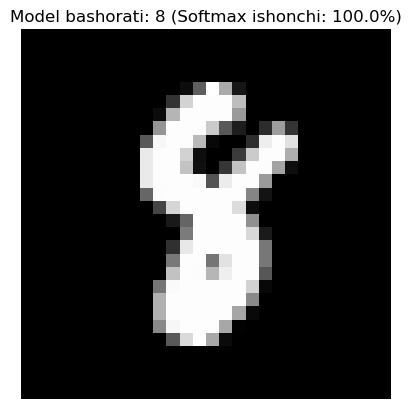


📁 Model 'raqam_model.h5' sifatida saqlandi.


In [2]:
# === 1. Kutubxonalarni chaqirish ===
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# === 2. Ma'lumotlarni yuklash ===
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# === 3. CNN uchun o'lchamni moslash ===
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# === 4. Natijalarni "one-hot encoding"ga o‘tkazish ===
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# === 5. Model yaratish ===
model = Sequential([
    # 1. Convolutional qatlam
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    # 2. Ikkinchi convolution qatlam
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    # 3. Flatten
    Flatten(),

    # 4. Fully connected qatlam
    Dense(128, activation='relu'),

    # 5. **Softmax qatlam (asosiy qism)**
    Dense(10, activation='softmax')
])

# === 6. Modelni kompilyatsiya qilish ===
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# === 7. Modelni o‘qitish ===
print("\nModel o‘qitilmoqda, iltimos kuting...")
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_test, y_test),
                    verbose=2)

# === 8. Modelni baholash ===
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Test aniqligi: {test_acc*100:.2f}%")

# === 9. Softmax natijasini ko‘rsatish ===
index = np.random.randint(0, len(x_test))
img = x_test[index].reshape(1, 28, 28, 1)
pred = model.predict(img)
pred_label = np.argmax(pred)

plt.imshow(x_test[index].reshape(28,28), cmap='gray')
plt.title(f"Model bashorati: {pred_label} (Softmax ishonchi: {np.max(pred)*100:.1f}%)")
plt.axis('off')
plt.show()

# === 10. Modelni saqlash (keyingi real-time dastur uchun) ===
model.save("raqam_model.h5")
print("\n📁 Model 'raqam_model.h5' sifatida saqlandi.")
